First, we import pandas and then we can call read_csv(), where we can provide some additional arguments, like the names for our columns.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('QueryResults.csv')

In [ ]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [ ]:
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [ ]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [ ]:
df.shape

(1991, 3)

In [ ]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

Which programming language had the most number of posts since the creation of Stack Overflow?

In order to look at the number of entries and the number of posts by programming language, we need to make use of the `.groupby()` method. The key is combining `.groupby()` with the TAG column, which holds as our categories (the names of the programming languages).

If we `.sum()` the number of posts then we can see how many posts each programming language had since the creation of Stack Overflow.

In [ ]:
df.groupby("TAG").sum()

<ipython-input-14-a2cc2c872c1d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("TAG").sum()


,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


If we .count() the entries in each column, we can see how many months of entries exist per programming language.

In [ ]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


#Data Cleaning: Working with Time Stamps
Let's take a closer look at the 'DATE' column in our DataFrame. We can use the double square bracket notation to look at the second entry in the column:



In [ ]:
df['DATE'][1]

'2008-08-01 00:00:00'

I prefer the square bracket notation for column names since it's more flexible, but with the dot notation, you get to use autocomplete, which is also nice.

**nspecting the Data Type**

When we type check the contents of this cell, we see that we are not dealing with a date object, but rather with a string.

In [ ]:
type(df["DATE"][1])

str

This is not very handy. Not only will the string format always show the unnecessary 00:00:00, but we also don't get the benefit of working with Datetime objects, which know how to handle dates and times. Pandas can help us convert the string to a timestamp using the to_datetime() method.

Here's how we can convert the entry in our cell and check that it worked:


In [ ]:
print(pd.to_datetime(df.DATE[1]))
type((pd.to_datetime(df.DATE[1]))
)

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

Let's use Pandas' to_datetime() to convert the entire df['DATE'] column.

In [ ]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


Excellent. Now we can start thinking about how to manipulate our data so that we get a one column per programming language. For all of that and more, I'll see you in the next lesson.

In [ ]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [ ]:
a_df = test_df.pivot(index='Age',columns='Actor',values='Power')
a_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [ ]:
reshaped_df = df.pivot(index='DATE',columns='TAG',values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

#Dealing with NaN Values
In this case, we don't want to drop the rows that have a NaN value. Instead, we want to substitute the number 0 for each NaN value in the DataFrame. We can do this with the .fillna() method.

In [ ]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


We can also check if there are any NaN values left in the entire DataFrame with this line:

Here we are using the .isna() method that we've used before, but we're chaining two more things: the values attribute and the any() method. This means we don't have to search through the entire DataFrame to spot if .isna() is True.

In [ ]:
reshaped_df.isna().values.any()

False

#Data Visualisation with Matplotlib
##Matplotlib

To create our first charts we're going to use a library called Matplotlib. There are many different libraries in Python to help us create charts and graphs. Matplotlib is an incredibly popular one and it works beautifully in combination with Pandas, so let's check it out.

First, we have to import Matplotlib.

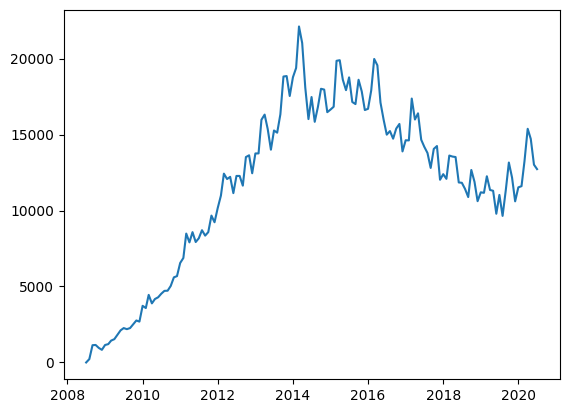

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(reshaped_df.index,reshaped_df['java'])

**Styling the Chart**

Let's look at a couple of methods that will help us style our chart:

`.figure()` - allows us to resize our chart

`.xticks()` - configures our x-axis

`.yticks()` - configures our y-axis

`.xlabel()` - add text to the x-axis

`.ylabel()` - add text to the y-axis

`.ylim()` - allows us to set a lower and upper bound

To make our chart larger we can provide a width (16) and a height (10) as the `figsize` of the figure.

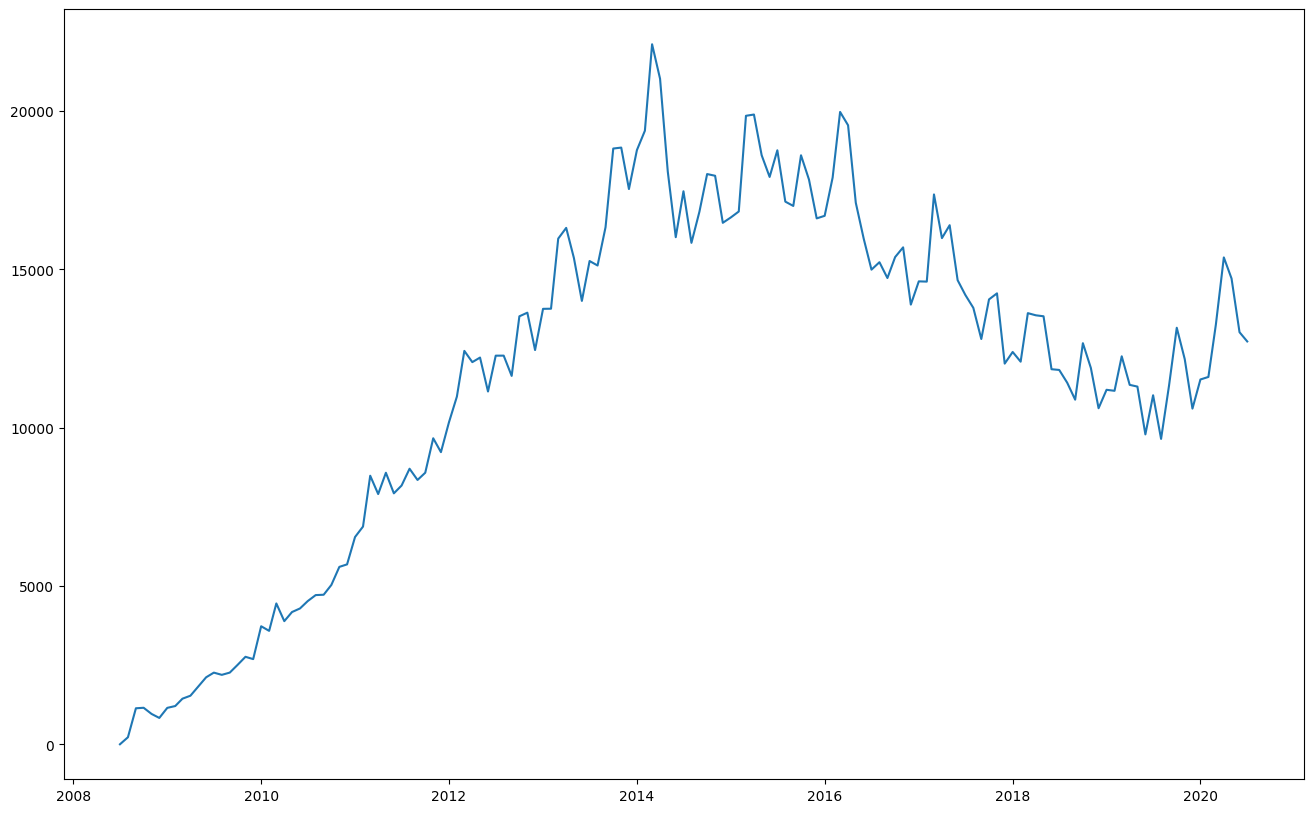

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)

Now we can add labels. Also, we're never going to get less than 0 posts, so let's set a lower limit of 0 for the y-axis with .ylim().

(0.0, 35000.0)

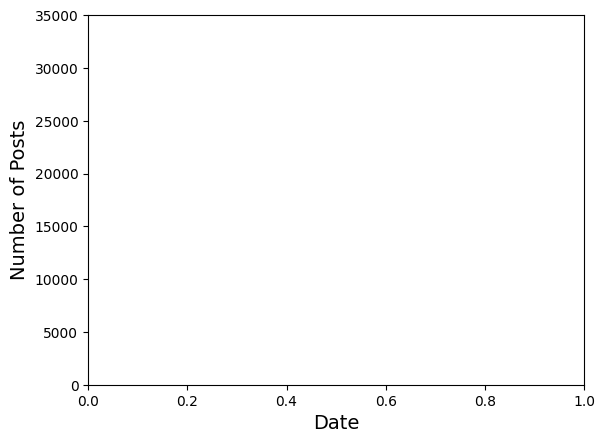

In [ ]:
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

Now that you've successfully created and styled your chart, can you figure out how to plot both Java and Python next to each other? The result should look something like this:

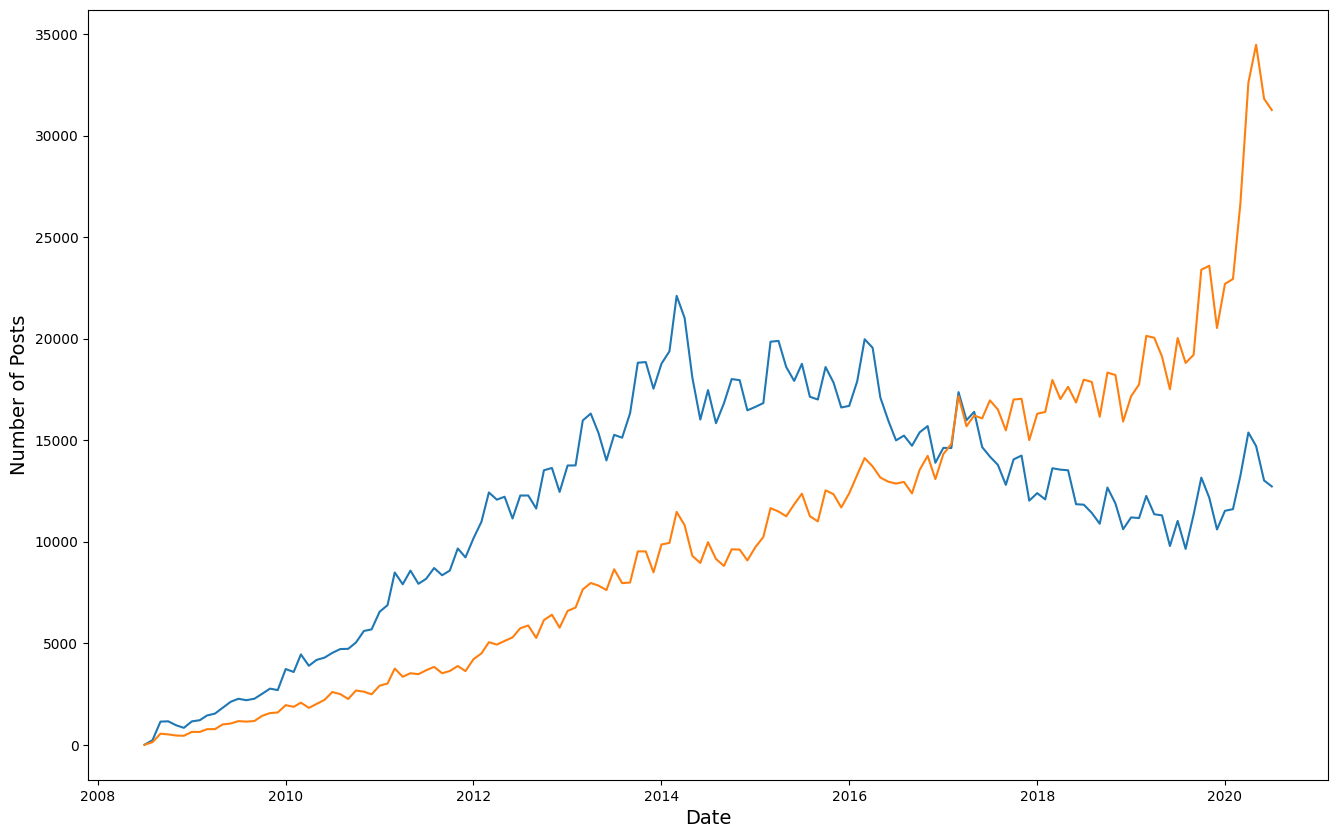

In [ ]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java,reshaped_df.python)

But what if we wanted to plot all the programming languages on the same chart? We don't want to type out .plot() a million times, right? We can actually just use a for-loop:

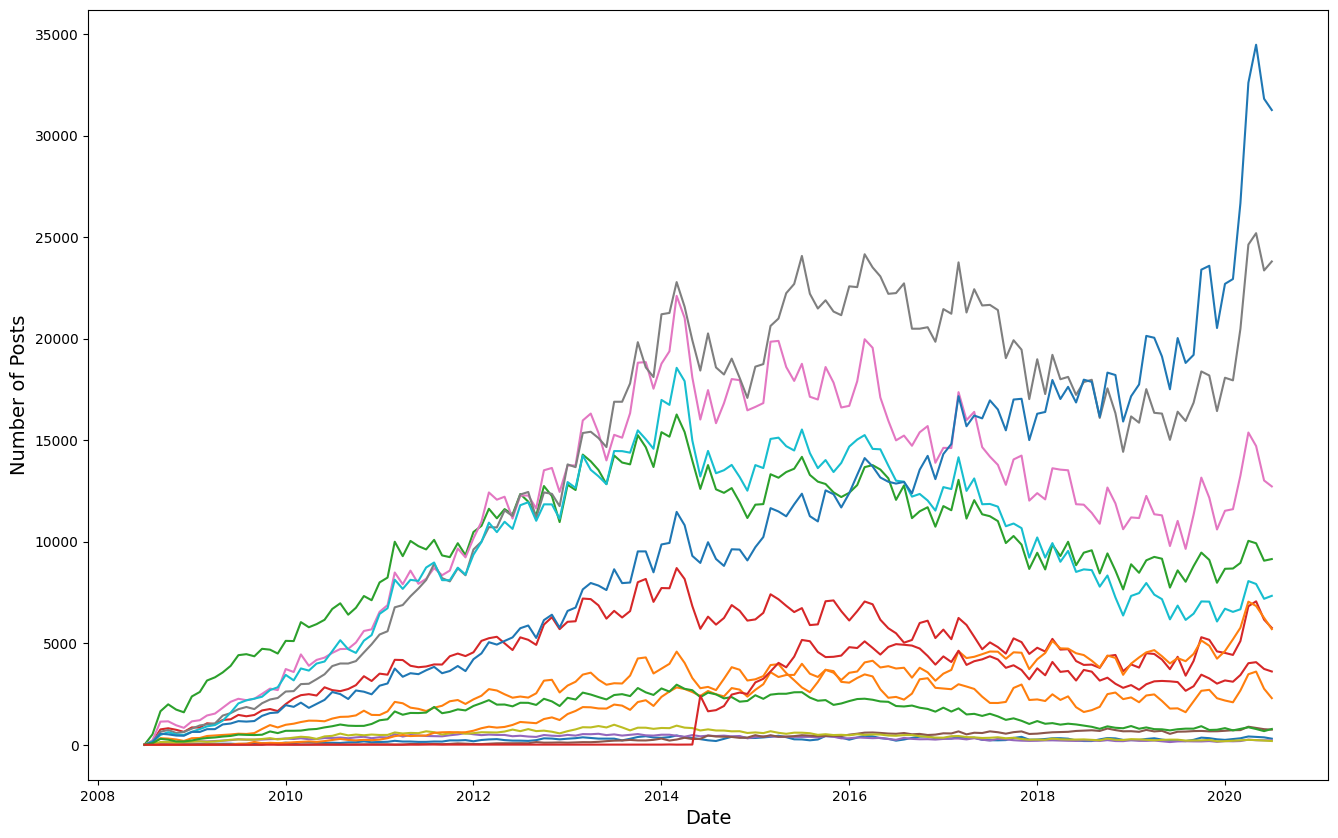

In [ ]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index,reshaped_df[column])


But wait, which language is which? It's really hard to make out without a legend that tells us which colour corresponds to each language. Let's modify the plotting code to add a label for each line based on the column name (and make the lines thicker at the same time using linewidth). Then let's add a legend to our chart:

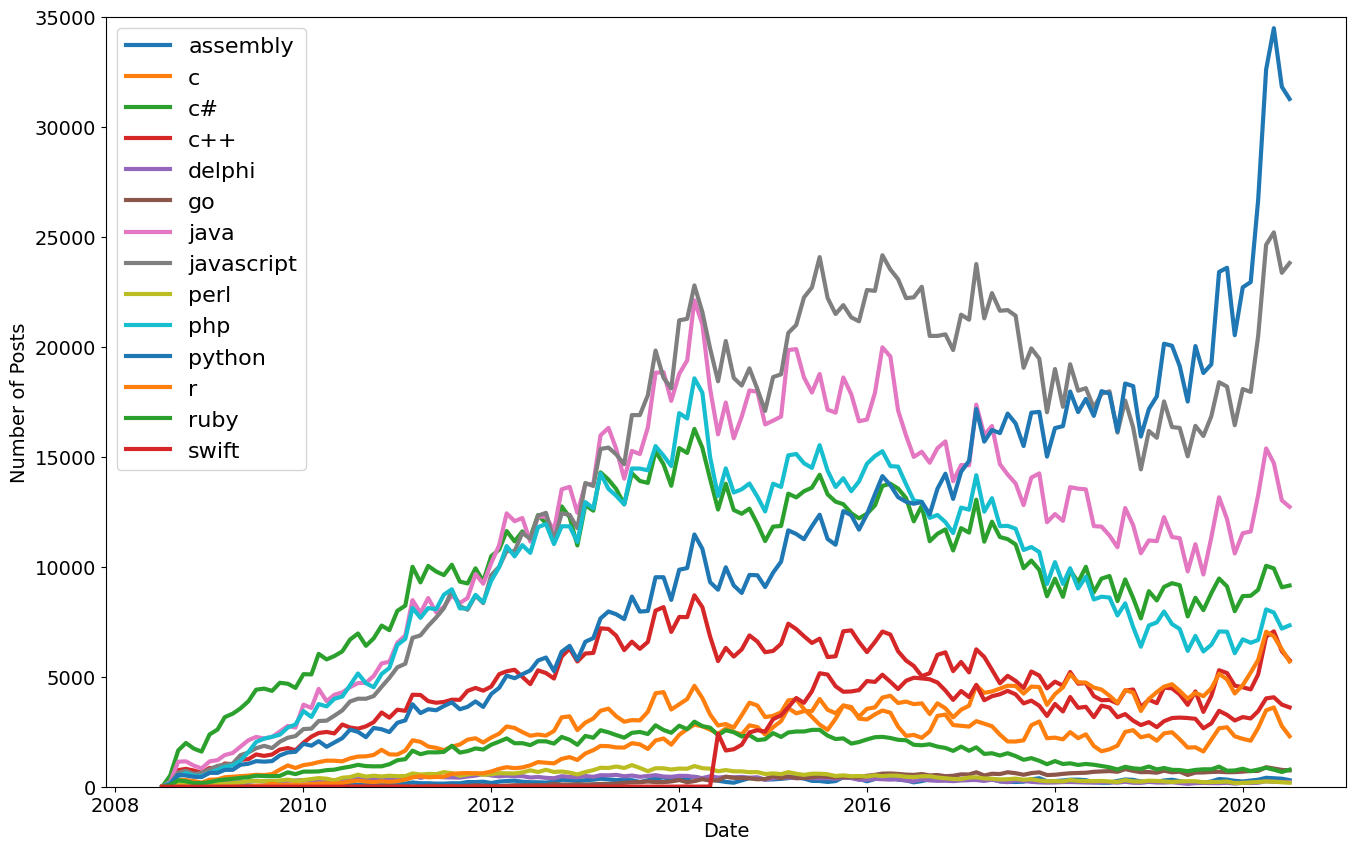

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

#Smoothing out Time-Series Data
Looking at our chart we see that time-series data can be quite noisy, with a lot of up and down spikes. This can sometimes make it difficult to see what's going on.

A useful technique to make a trend apparent is to smooth out the observations by taking an average. By averaging say, 6 or 12 observations we can construct something called the rolling mean. Essentially we calculate the average in a window of time and move it forward by one observation at a time.

Since this is such a common technique, Pandas actually two handy methods already built-in: rolling() and mean(). We can chain these two methods up to create a DataFrame made up of the averaged observations.



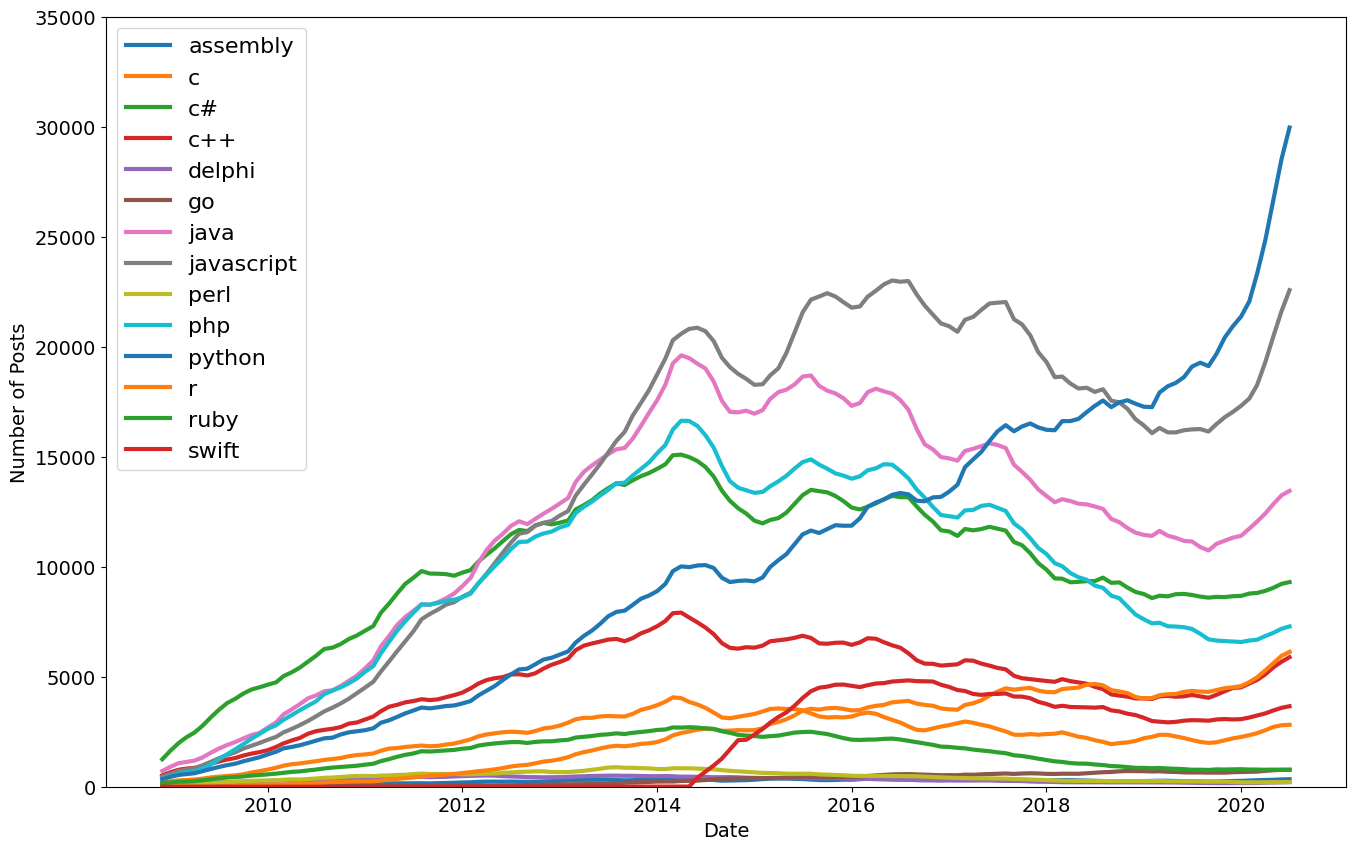

In [ ]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

# Learning Points & Summary
Congratulations on completing another challenging data science project! Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

- used .groupby() to explore the number of posts and entries per programming language

- converted strings to Datetime objects with to_datetime() for easier plotting

- reshaped our DataFrame by converting categories to columns using .pivot()

- used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

- created (multiple) line charts using .plot() with a for-loop

- styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

- added a legend to tell apart which line is which by colour

- smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.

